# RGB cutouts

In [1]:
# imports
import astropy.units as u
import numpy as np
from copy import deepcopy
from galfind import Catalogue, RGB
from galfind.Data import morgan_version_to_dir

Reading GALFIND config file from: /nvme/scratch/work/austind/GALFIND/galfind/../configs/galfind_config.ini


Failed to `import dust_attenuation`
Install from the repo with $ pip install git+https://github.com/karllark/dust_attenuation.git


In [2]:
survey = "JOF"
version = "v11"
instrument_names = ["NIRCam"]
aper_diams = [0.32] * u.arcsec
forced_phot_band = ["F277W", "F356W", "F444W"]
min_flux_pc_err = 10.

JOF_cat = Catalogue.pipeline(
    survey, 
    version, 
    instrument_names = instrument_names, 
    version_to_dir_dict = morgan_version_to_dir,
    aper_diams = aper_diams,
    forced_phot_band = forced_phot_band,
    min_flux_pc_err = min_flux_pc_err
)
# TODO: Smooth galaxy load-in
# from Robertson et al. 2023
z14_gal = JOF_cat[717]

INFO:galfind:Loaded aper_diams=<Quantity [0.32] arcsec> for F277W+F356W+F444W
INFO:galfind:Combined mask for NIRCam/F277W+F356W+F444W already exists at /raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/combined/JOF_F277W+F356W+F444W_auto.fits
Calculating depths:   0%|          | 0/15 [00:00<?, ?it/s]
INFO:galfind:Calculated/loaded depths for JOF v11 NIRCam
INFO:galfind:Local depth columns already exist in /raid/scratch/work/austind/GALFIND_WORK/Catalogues/v11/NIRCam/JOF/(0.32)as/JOF_MASTER_Sel-F277W+F356W+F444W_v11.fits
INFO:galfind:Loaded 'has_data_mask' from /raid/scratch/work/austind/GALFIND_WORK/Masks/JOF/has_data_mask/JOF_MASTER_Sel-F277W+F356W+F444W_v11.h5
INFO:galfind:Making JOF v11 JOF_MASTER_Sel-F277W+F356W+F444W_v11 catalogue!
INFO:galfind:Made /raid/scratch/work/austind/GALFIND_WORK/Catalogues/v11/NIRCam/JOF/(0.32)as/JOF_MASTER_Sel-F277W+F356W+F444W_v11.fits catalogue!


Now that we have set up the z=14.63 galaxy candidate as before, we will now construct an `RGB_Cutout` object which stores all the information required to plot an RGB.

## Example 1: Constructing RGB objects

In [3]:
# define RGB bands
rgb_bands = {"B": "F090W", "G": "F200W", "R": "F444W"}
z14_rgb = RGB.from_gal_data(z14_gal, JOF_cat.data, rgb_bands, 6. * u.arcsec, overwrite = False)

print(z14_rgb)

INFO:galfind:Already made fits cutout for JOF v11 718 F090W
INFO:galfind:Already made fits cutout for JOF v11 718 F200W
INFO:galfind:Already made fits cutout for JOF v11 718 F444W


## Example 2: Plotting cutout RGBs

Let's now have a go at plotting this RGB using astropy.vizualization.make_lupton_rgb.

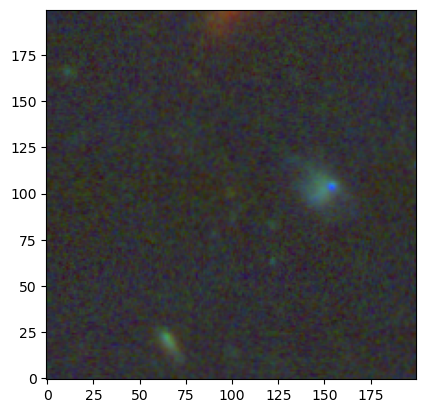

In [ ]:
rgb_kwargs = {"minimum": -0.3, "stretch": 2., "Q": 8.}
z14_rgb.plot(
    method = "lupton", 
    rgb_kwargs = rgb_kwargs, 
    show = True
    )